## **Análisis Descriptivo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

-----

**Cargar el conjunto de datos**

In [3]:
df_2012_2023 = pd.read_csv('../data/processed/mex_trade_2012_2023_clean.csv')
df_2012_2023.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2012,1,Total Exports,"27,281.58",Final Figures
1,Trade Balance of Goods of Mexico,National,Exports,2012,1,Petroleum,"4,628.30",Final Figures
2,Trade Balance of Goods of Mexico,National,Exports,2012,1,Crude Oil,"4,008.11",Final Figures
3,Trade Balance of Goods of Mexico,National,Exports,2012,1,Other Oil,620.18,Final Figures
4,Trade Balance of Goods of Mexico,National,Exports,2012,1,Non Petroleum,"22,653.28",Final Figures


---

**Volumen total de exportaciones e importaciones por año.**

In [4]:
expor_import_2012_2023 = df_2012_2023.groupby(['year','type'])['value_usd'].sum()
expor_import_2012_2023

year  type          
2012  Exports          1,112,309.67
      Imports          1,502,457.46
      Not applicable      -9,688.95
2013  Exports          1,140,045.15
      Imports          1,544,351.16
      Not applicable     -12,145.48
2014  Exports          1,190,740.90
      Imports          1,623,145.84
      Not applicable     -17,745.65
2015  Exports          1,141,668.26
      Imports          1,601,116.96
      Not applicable     -39,446.30
2016  Exports          1,121,860.84
      Imports          1,569,246.66
      Not applicable     -36,716.10
2017  Exports          1,228,297.72
      Imports          1,705,150.95
      Not applicable     -33,710.33
2018  Exports          1,352,138.18
      Imports          1,882,275.57
      Not applicable     -39,712.33
2019  Exports          1,381,811.63
      Imports          1,844,718.77
      Not applicable      -1,151.63
2020  Exports          1,251,512.20
      Imports          1,552,528.28
      Not applicable      58,077.33
2021  E

In [5]:
# Convertir la Serie a DataFrame para facilitar su uso
df_expor_import_2012_2023 = expor_import_2012_2023.reset_index()

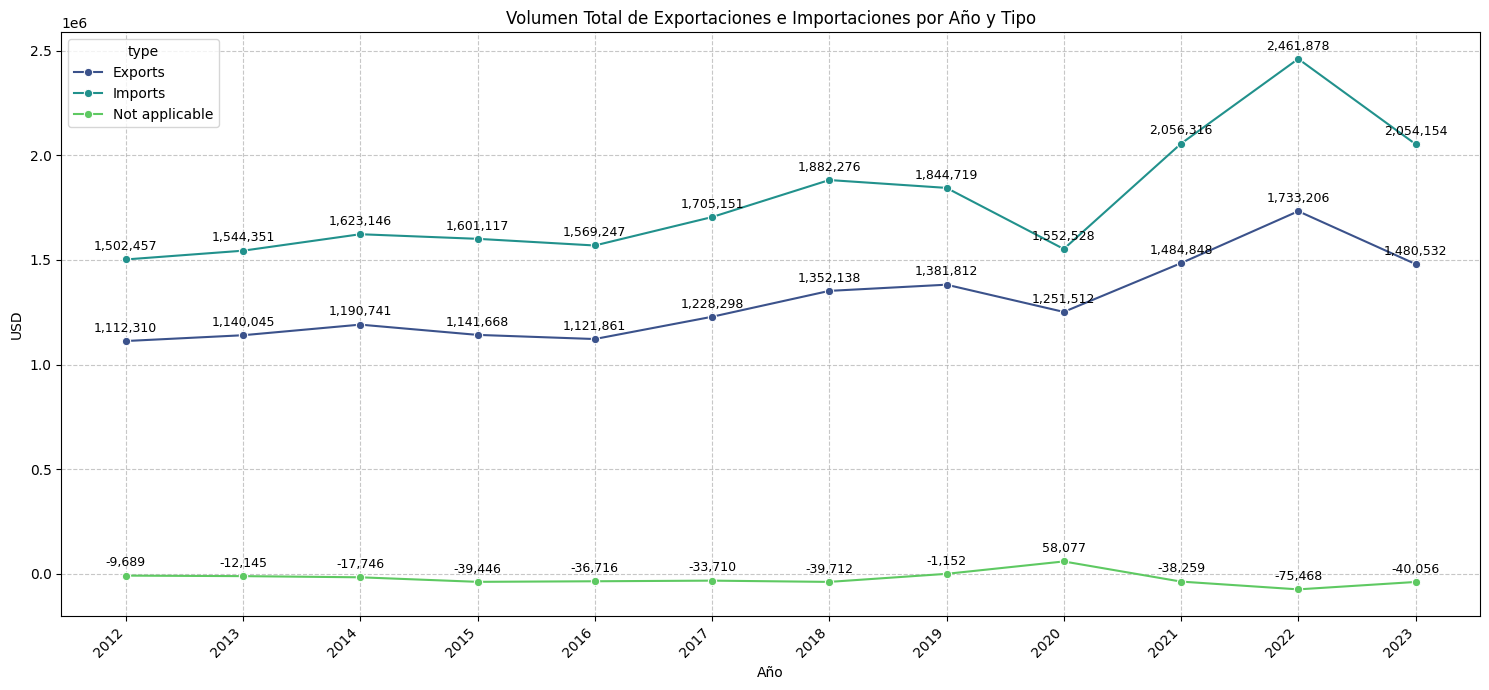

In [6]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year', y='value_usd', hue='type', data=df_expor_import_2012_2023, marker='o', palette='viridis' )

for transaction_type in df_expor_import_2012_2023['type'].unique():
    subset_df = df_expor_import_2012_2023[df_expor_import_2012_2023['type'] == transaction_type]  
    for index, row in subset_df.iterrows():
        x_pos = row['year']
        y_pos = row['value_usd']
        text_value = '{:,.0f}'.format(y_pos) 
        y_offset = 30000
    
        plt.text(
            x_pos, 
            y_pos + y_offset, 
            text_value,
            ha='center',      
            va='bottom',      
            fontsize=9,       
            color='black'     
            # fontweight='bold'
        )

plt.title('Volumen Total de Exportaciones e Importaciones por Año y Tipo')
plt.xlabel('Año')
plt.ylabel('USD')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_expor_import_2012_2023['year'].unique(),rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Observaciones Clave:

***Dominio de Importaciones (Línea Turquesa):***
* Las Importaciones consistentemente representan el mayor volumen de valor en USD a lo largo de todo el período (línea turquesa/verde azulado). Superan significativamente a las Exportaciones en la mayoría de los años.
Se observa una tendencia general de crecimiento en las importaciones desde 2012 hasta 2022, alcanzando un pico de aproximadamente $2,461,878 en 2022.
Hay una ligera disminución en las importaciones en 2023, cerrando en $2,054,154.

***Crecimiento Sostenido de Exportaciones (Línea Azul Oscuro):***

* Las Exportaciones (línea azul oscuro) también muestran una tendencia de crecimiento a lo largo del período, aunque con fluctuaciones.
* Comienzan en $1,112,310 en 2012 y alcanzan un pico en 2022 con $1,733,206.
* Similar a las importaciones, las exportaciones también experimentan una caída en 2023, situándose en $1,480,532.

***Impacto de "Not applicable" (Línea Verde Claro):***

* La categoría "Not applicable" (línea verde claro) permanece consistentemente en valores negativos y cercanos a cero a lo largo de todos los años.

* Esto sugiere que esta categoría podría representar saldos negativos, ajustes o rubros que restan al valor total del comercio, en lugar de un volumen de bienes o servicios. Su valor se mantiene relativamente bajo en comparación con las exportaciones e importaciones, oscilando entre -$9,689 (2012) y -$75,468 (2022). El valor más positivo que alcanza es un ligero $58,077 en 2020.

**Comportamiento Reciente (2020-2023):**

* 2020 (Año de la Pandemia): Se observa una caída notable tanto en exportaciones ($1,251,512) como en importaciones ($1,532,528) en 2020. Esto es esperable debido a las interrupciones en el comercio global por la pandemia de COVID-19.
* Recuperación Post-Pandemia (2021-2022): Hubo una fuerte recuperación en 2021 y 2022, con ambos volúmenes alcanzando sus puntos más altos en 2022.
* Ligero Descenso en 2023: Tanto las exportaciones como las importaciones muestran una disminución en 2023 en comparación con 2022. Esto podría indicar una desaceleración en el crecimiento del comercio al final del período analizado.

* Se observa una tendencia creciente entre 2012 y 2023, con una caída notable en 2020 (posible efecto de la pandemia).
* A partir de 2021, el comercio se recupera y alcanza máximos históricos en 2022.

-----

**Top Conceptos (concept) con mayor valor acumulado**

In [7]:
top_concept = df_2012_2023.groupby(['type','concept'])['value_usd'].sum()
top_concept = top_concept.sort_values(ascending=False)
top_concept


type            concept                                                             
Imports         Total Imports CIF (Total Imports + Freight and Insurance of Imports)   5,427,293.28
                Total Imports                                                          5,271,376.28
Exports         Total Exports                                                          5,206,323.57
                Non Petroleum                                                          4,825,251.71
Imports         Non Petroleum                                                          4,735,094.93
Exports         Manufacturing                                                          4,559,581.43
Imports         Intermediate Goods                                                     4,054,238.92
                Consumer Goods                                                           721,242.39
                Petroleum                                                                536,281.35
               

Los conceptos con mayor valor acumulado por tipo son los siguientes:
**Imports:**
* **Total Imports CIF (Total Imports + Freight and Insurance of Imports)**  con  ***$5,427,293.28***
**Exports:**
* **Total Exports** con ***$5,206,323.57***

Con valores negativos son:
**Not applicable:**
*  **Total Trade Balance Exports Total - Imports Total CIF** con   ***$-220,969.71***

In [8]:
df_top_concept = top_concept.reset_index()
df_top_concept

,type,concept,value_usd
0,Imports,Total Imports CIF (Total Imports + Freight and...,"5,427,293.28"
1,Imports,Total Imports,"5,271,376.28"
2,Exports,Total Exports,"5,206,323.57"
3,Exports,Non Petroleum,"4,825,251.71"
4,Imports,Non Petroleum,"4,735,094.93"
5,Exports,Manufacturing,"4,559,581.43"
6,Imports,Intermediate Goods,"4,054,238.92"
7,Imports,Consumer Goods,"721,242.39"
8,Imports,Petroleum,"536,281.35"
9,Imports,Capital Goods,"495,894.97"


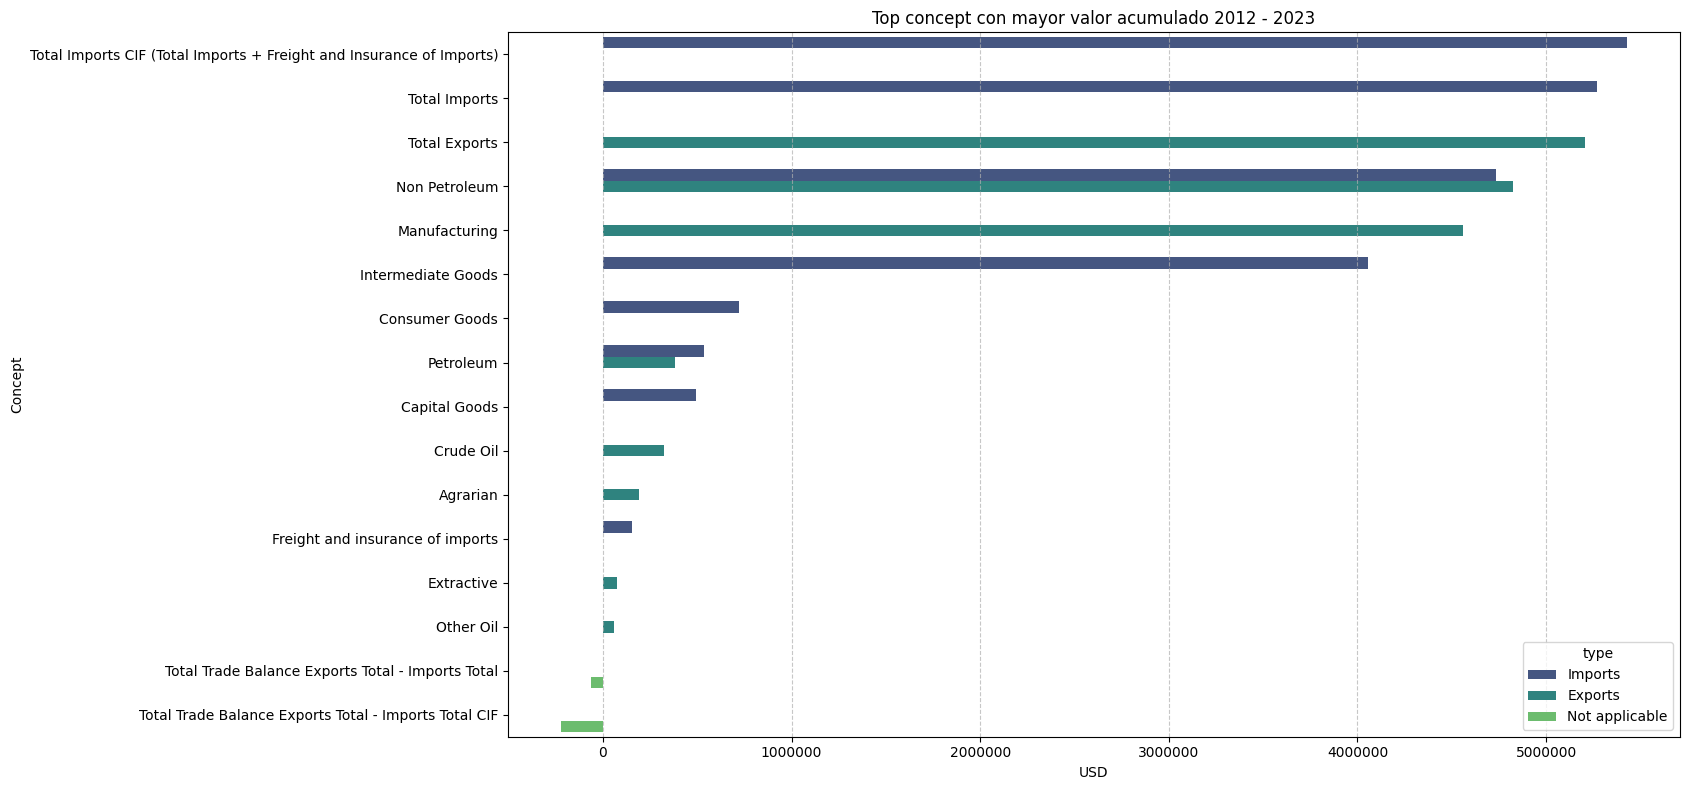

In [9]:
x_value_usd = df_top_concept['value_usd']
y_concept = df_top_concept['concept']

plt.figure(figsize=(17,8))
sns.barplot(x=x_value_usd, y=y_concept, data=df_top_concept, hue='type', palette='viridis')

plt.title('Top concept con mayor valor acumulado 2012 - 2023')
plt.xlabel('USD')
plt.ylabel('Concept')

plt.ticklabel_format(style='plain', axis='x') # Desactiva la notación científica
plt.grid(axis='x', linestyle='--', alpha=0.7) # Añadir cuadrícula en el eje X
plt.tight_layout()

plt.show()

***El Dominio de las Importaciones***

Es evidente que las importaciones juegan un papel central y dominante en el panorama económico. Los dos conceptos de mayor valor acumulado, "Total Imports CIF" (que incluye flete y seguro) y "Total Imports", destacan la magnitud de los bienes que ingresan al país. Esto sugiere una fuerte dependencia de productos y componentes extranjeros para satisfacer la demanda interna y la producción.

***El Peso de las Exportaciones y el Rol No Petrolero***

Aunque las importaciones lideran, las exportaciones totales ocupan el tercer lugar en relevancia, indicando su importancia en el flujo comercial. Un punto clave es el volumen significativo de comercio de productos no petroleros. Si bien las importaciones en este sector superan a las exportaciones, su relevancia combinada subraya la diversificación de nuestra actividad comercial más allá del petróleo.

***Radiografía por Tipo de Comercio: ¿Quién Importa y Quién Exporta?***
La desagregación por tipo de comercio nos ofrece una visión más profunda:

* **Manufactura:** Este sector es un pilar, con un alto valor y un flujo bidireccional considerable, aunque dominado por las importaciones. Esto apunta a una economía que ensambla y procesa bienes con componentes importados, pero también exporta productos manufacturados.
* **Bienes Intermedios y de Consumo:** Ambas categorías son preponderantemente de importaciones, lo que es típico de cadenas de suministro que dependen de insumos extranjeros y de un mercado que consume productos importados.
* **Petróleo:** Muestra un balance interesante, con contribuciones tanto de importaciones como de exportaciones, siendo las exportaciones ligeramente superiores en el valor acumulado.

***Categorías de Menor Impacto y el Déficit Comercial***

Conceptos como petróleo crudo, productos agrarios, y el flete y seguro de las importaciones, aunque necesarios, representan un valor acumulado significativamente menor en comparación con los grandes agregados.

Finalmente, la observación de que el balance comercial es negativo (tanto "Total Trade Balance Exports Total - Imports Total" como "Total Trade Balance Exports Total - Imports Total CIF" muestran valores negativos) refuerza la idea de que, en general, importamos más de lo que exportamos. Esto concuerda con las mayores barras de importación y sugiere un déficit comercial persistente.

-----

**Participación porcentual anual de exportaciones vs importaciones**

In [ ]:
df_filtered = df_2012_2023[df_2012_2023['type'].isin(['Exports', 'Imports','Not applicable'])].copy()

annual_totals = df_filtered.groupby(['year', 'type'])['value_usd'].sum().unstack(fill_value=0)

annual_totals['Total_Trade'] = annual_totals['Exports'] + annual_totals['Imports'] + annual_totals['Not applicable']

annual_totals['Exports %'] = (annual_totals['Exports'] / annual_totals['Total_Trade']) * 100
annual_totals['Imports %'] = (annual_totals['Imports'] / annual_totals['Total_Trade']) * 100
annual_totals['Not applicable %'] = (annual_totals['Not applicable'] / annual_totals['Total_Trade']) * 100

participation_df = annual_totals[['Exports %', 'Imports %', 'Not applicable %']].reset_index()

print("Participación Porcentual Anual de Exportaciones vs Importaciones:")
print(participation_df.round(2))

Participación Porcentual Anual de Exportaciones vs Importaciones:
type  year  Exports %  Imports %  Not applicable %
0     2012      42.70      57.67             -0.37
1     2013      42.66      57.79             -0.45
2     2014      42.59      58.05             -0.63
3     2015      42.23      59.23             -1.46
4     2016      42.26      59.12             -1.38
5     2017      42.36      58.80             -1.16
6     2018      42.32      58.92             -1.24
7     2019      42.84      57.19             -0.04
8     2020      43.73      54.24              2.03
9     2021      42.39      58.70             -1.09
10    2022      42.07      59.76             -1.83
11    2023      42.37      58.78             -1.15


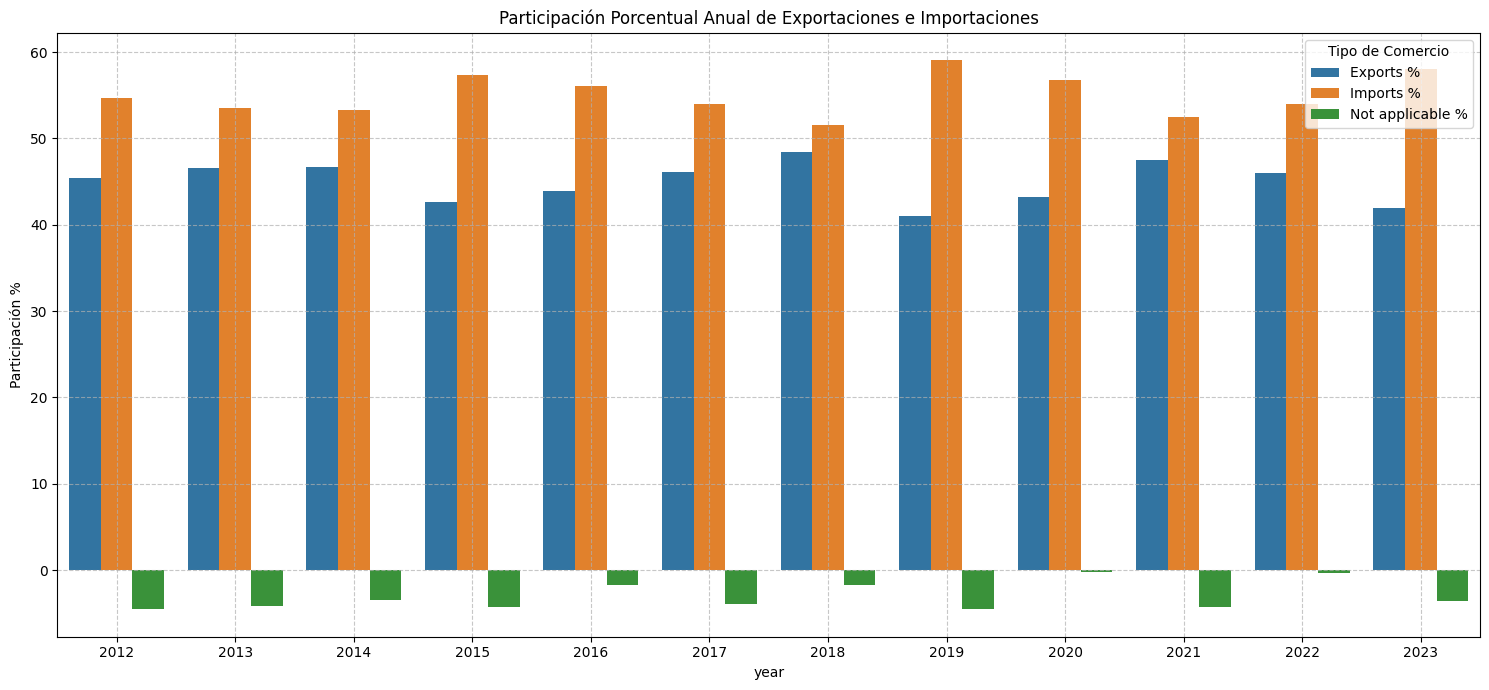

In [36]:
df_percentage_melted = participation_df.melt(id_vars='year', var_name='Tipo de Comercio', value_name='Participación %')

plt.figure(figsize=(15,7))
ax = sns.barplot(data=df_percentage_melted, x='year', y='Participación %', hue='Tipo de Comercio')
plt.title('Participación Porcentual Anual de Exportaciones e Importaciones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***Las Importaciones Lideran de Forma Sostenida***

A lo largo de todo el período (2012-2023), las importaciones han sido el motor principal de nuestro comercio exterior, representando consistentemente más del 57% del total anual. Esta hegemonía subraya una economía con una alta demanda de bienes y servicios del extranjero, ya sea para consumo o como insumos para la producción nacional.

***Exportaciones: Estabilidad en la Proporción, no en el Volumen***

Mientras que las importaciones marcan la pauta, las exportaciones han mantenido una participación sorprendentemente estable, oscilando alrededor del 42%-43% del comercio total cada año. Esto sugiere que, a pesar de las fluctuaciones en el volumen absoluto de exportaciones, su proporción relativa dentro del pastel comercial se ha mantenido constante, lo que podría indicar una capacidad exportadora resiliente o una estructura de mercado consolidada.

***La Anomalia de 2020: Un Punto de Inflexión Inesperado***

El año 2020 destaca como una excepción notable, muy probablemente influenciada por la pandemia global. En contraste con la tendencia general, la participación de las importaciones disminuyó a su punto más bajo (54.24%), mientras que las exportaciones alcanzaron su pico (43.73%).

Además, la categoría "Not applicable %" (que generalmente representa ajustes negativos o una resta en el balance comercial) se tornó positiva (2.03%) por primera vez en el período analizado. Este cambio abrupto podría indicar que, en medio de la crisis de 2020, la caída en las importaciones fue más pronunciada que la de las exportaciones, alterando drásticamente las proporciones relativas del comercio total.

---

**Mapas de calor: valor mensual promedio por año**

In [13]:
valor_mensual_promedio_annio = pd.pivot_table(df_2012_2023, values='value_usd', index='year', columns='month', aggfunc='mean')
valor_mensual_promedio_annio

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,"10,680.65","11,659.83","12,447.48","12,013.94","12,897.06","11,747.81","11,871.92","12,469.27","11,405.71","13,431.06","12,423.47","11,678.37"
2013,"10,977.79","11,352.12","12,234.08","12,926.48","12,872.03","12,030.26","12,745.71","12,780.21","12,173.82","13,708.28","12,326.42","12,331.17"
2014,"10,922.04","11,792.54","12,874.13","13,246.15","13,409.97","13,012.77","13,268.13","13,133.00","13,281.74","14,407.70","12,706.55","13,286.45"
2015,"10,732.92","11,536.59","13,281.16","12,877.13","12,320.40","13,270.65","13,028.53","12,420.88","12,729.59","13,477.80","12,271.83","12,238.01"
2016,"10,008.37","11,395.93","12,282.90","12,100.76","12,311.41","12,531.01","11,828.84","12,879.63","12,938.40","12,827.39","13,399.52","12,962.03"
2017,"11,058.01","12,153.00","14,081.19","12,302.59","13,933.29","13,878.05","12,727.07","14,320.70","13,405.24","14,590.09","14,596.20","14,051.13"
2018,"12,490.25","13,594.23","15,215.75","14,547.14","15,483.16","14,734.64","14,667.82","15,729.74","14,752.38","16,475.04","15,329.37","14,463.88"
2019,"13,263.59","14,070.89","15,063.51","15,282.01","16,188.04","14,517.22","15,413.43","15,588.17","14,529.78","15,987.37","14,541.83","14,741.86"
2020,"13,389.70","13,915.55","14,579.74","9,433.74","7,466.27","12,276.76","13,220.19","13,749.98","14,548.62","15,671.66","14,612.33","16,141.99"


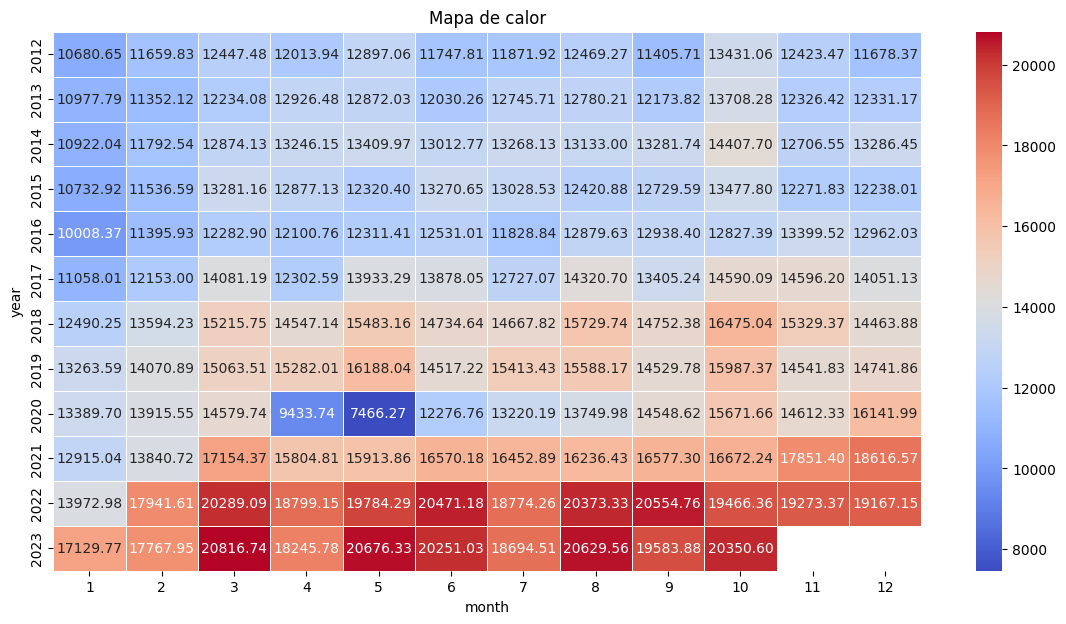

In [14]:
plt.figure(figsize=(14,7))
sns.heatmap(valor_mensual_promedio_annio, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Mapa de calor')
plt.show()